### **Analyzing New York Taxi Data Using PySpark on Azure (Free Tier)**

#### **Introduction**
You are a data engineer at a transportation analytics company. Your team has been tasked with analyzing the New York City taxi dataset to uncover insights that can help improve taxi services, optimize routes, and understand customer behavior. The dataset is large, but you decide to use PySpark on Azure Databricks to handle the data processing efficiently.

---

### **Step 1: Setting Up the Environment**
**Story:**  
You start by setting up your cloud environment. Azure Databricks is chosen because it provides a collaborative, scalable, and managed platform for big data analytics with PySpark. You create a Databricks workspace and a small cluster, and configure it to read data from an Azure Blob Storage account where the dataset is stored.

**Mini Tasks:**
1. Create a free Azure account if you don’t already have one.
2. Set up an Azure Blob Storage account and upload a subset of the New York taxi dataset (e.g., `trip_data.csv` and `trip_fare.csv`).
3. Create an Azure Databricks workspace and launch a small cluster with PySpark installed.
4. Mount the Blob Storage container to your Databricks workspace using the `abfss` protocol or a SAS token.
5. Verify that PySpark is working by running a simple script to print "Hello, PySpark!"

---

### **Step 2: Loading and Exploring the Data**
**Story:**  
With the environment ready, you load the dataset into PySpark DataFrames. The dataset contains information about taxi trips, including pickup/dropoff locations, timestamps, trip distances, fares, and payment types. You begin by exploring the data to understand its structure and identify any quality issues.

**Mini Tasks:**
1. Load a subset of the `trip_data.csv` and `trip_fare.csv` files from Blob Storage into PySpark DataFrames.
2. Print the schema of both DataFrames to understand the column names and data types.
3. Check for missing values and duplicates in the dataset.
4. Display the first 5 rows of each DataFrame to get a sense of the data.

---

### **Step 3: Data Cleaning and Transformation**
**Story:**  
You notice some inconsistencies in the data, such as missing values in the `passenger_count` column and incorrect timestamps. You decide to clean the data by removing invalid records and transforming columns into the correct formats.

**Mini Tasks:**
1. Drop rows with missing values in critical columns like `pickup_datetime`, `dropoff_datetime`, and `trip_distance`.
2. Convert the `pickup_datetime` and `dropoff_datetime` columns to timestamp format.
3. Filter out rows where `trip_distance` is 0 or negative.
4. Create a new column `trip_duration` by calculating the difference between `dropoff_datetime` and `pickup_datetime`.

---

### **Step 4: Joining Datasets**
**Story:**  
To get a complete picture of each trip, you decide to join the `trip_data` and `trip_fare` DataFrames using a common key, such as `medallion` and `hack_license`. This will allow you to analyze both trip details and fare information together.

**Mini Tasks:**
1. Identify the common columns between `trip_data` and `trip_fare` DataFrames.
2. Perform an inner join on the two DataFrames using the common columns.
3. Verify the join by checking the row count and inspecting the resulting DataFrame.

---

### **Step 5: Analyzing the Data**
**Story:**  
With the cleaned and joined dataset, you start analyzing it to uncover insights. You focus on answering key questions, such as:
- What is the average trip duration and fare?
- Which payment methods are most popular?
- What are the peak hours for taxi rides?

**Mini Tasks:**
1. Calculate the average `trip_duration` and `fare_amount`.
2. Group the data by `payment_type` and count the number of trips for each payment method.
3. Extract the hour from `pickup_datetime` and create a histogram to visualize peak hours.
4. Identify the top 5 pickup and dropoff locations based on trip frequency.

---

### **Step 6: Visualizing the Results**
**Story:**  
To make your findings more accessible, you decide to visualize the results using Databricks' built-in visualization tools or a Python library like Matplotlib or Seaborn. You export the aggregated data from PySpark to a Pandas DataFrame for easier plotting.

**Mini Tasks:**
1. Export the results of your analysis (e.g., average fare, peak hours) to a Pandas DataFrame.
2. Create a bar chart to show the distribution of payment types.
3. Plot a line chart to visualize the number of trips per hour (peak hours).
4. Generate a scatter plot to explore the relationship between `trip_distance` and `fare_amount`.

---

### **Step 7: Saving the Results**
**Story:**  
Finally, you save the cleaned dataset and analysis results back to Blob Storage for future use. You also document your findings in a report that will be shared with your team.

**Mini Tasks:**
1. Save the cleaned and joined DataFrame as a Parquet file in your Blob Storage account.
2. Export the aggregated results (e.g., peak hours, payment types) as a CSV file to Blob Storage.
3. Write a brief summary of your findings in a Markdown file and upload it to Blob Storage.

---

### **Conclusion**
**Story:**  
You’ve successfully built a PySpark pipeline to analyze the New York taxi dataset on Azure. Your analysis revealed valuable insights, such as peak hours, popular payment methods, and average trip durations. These findings will help your team make data-driven decisions to improve taxi services in New York City.

**Mini Tasks:**
1. Terminate the Databricks cluster to avoid unnecessary costs.
2. Share the Blob Storage links to the cleaned data, analysis results, and report with your team.

---

### **Bonus Challenge**
- Use PySpark MLlib to build a simple machine learning model that predicts taxi fares based on features like `trip_distance` and `trip_duration`.
- Explore geospatial analysis by visualizing pickup and dropoff locations on a map using libraries like Folium or Databricks' built-in mapping tools.

---

### **Tips for Staying Within Free Tier Limits**
1. Use a **small cluster** in Databricks and terminate it immediately after completing tasks.
2. Work with a **subset of the dataset** (e.g., 1-2 months of data) to reduce processing time and resource usage.
3. Use **compressed file formats** like Parquet or GZIP to save storage space in Blob Storage.
4. Monitor your usage in the Azure portal to ensure you stay within the free tier limits.

---

This project provides a hands-on experience with PySpark, Azure Databricks, and data analysis.

In [0]:
import pyspark
print(pyspark.__version__)

3.5.2


In [0]:
# Set the storage account name and container name
storage_account_name = "3mttwork" # Your storage account name
container_name = "nyc-taxi-data" # Your container name

# Get your storage account access key securely
storage_account_access_key = "jvAMGrY4yDSYGj7GxEZPTyD1o+mbBaqD+gCaIGbazujfHDmvW8BR2XQ75wUWyGTGy2L5exgtNtUs+AStN3PBMA=="

# Define the source path using the wasbs scheme
# Note: Use blob.core.windows.net for wasbs
source_path = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/"

# Define the mount point path in Databricks
mount_point = f"/mnt/{container_name}"

# Configure the Spark session with the access key for wasbs
spark.conf.set(f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net", storage_account_access_key)

# Check if the mount point already exists (optional, good practice)
if not any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts()):
    # Mount the Blob Storage container using wasbs
    dbutils.fs.mount(
        source=source_path,
        mount_point=mount_point,
        extra_configs={f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net": storage_account_access_key}
    )
    print(f"Mounted {container_name} to {mount_point}")
else:
    print(f"{mount_point} is already mounted.")

# List the contents of the mounted directory to verify
print("\nContents of mounted directory:")
dbutils.fs.ls(mount_point)

Mounted nyc-taxi-data to /mnt/nyc-taxi-data

Contents of mounted directory:


[FileInfo(path='dbfs:/mnt/nyc-taxi-data/yellow_tripdata_2025-01.parquet', name='yellow_tripdata_2025-01.parquet', size=59158238, modificationTime=1752513391000)]

In [0]:
# --- Step 2: Loading and Exploring the Data ---

# 1. Load the Parquet file from the mounted Blob Storage into a PySpark DataFrame
# The path is now relative to your mount point
file_path = f"{mount_point}/yellow_tripdata_2025-01.parquet"

# Load the Parquet file
df = spark.read.parquet(file_path)

print("DataFrame loaded successfully!")

# 2. Print the schema of the DataFrame to understand the column names and data types
print("\nSchema of the DataFrame:")
df.printSchema()

# 4. Display the first 5 rows of the DataFrame to get a sense of the data
print("\nFirst 5 rows of the DataFrame:")
df.show(5)

# (We will address missing values and duplicates in the next part)

DataFrame loaded successfully!

Schema of the DataFrame:
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)


First 5 rows of t

In [0]:
# --- Continuing Step 2: Checking for missing values and duplicates ---

# 3. Check for missing values in the dataset
print("\nChecking for missing values:")
from pyspark.sql.functions import col, sum

# Calculate the count of nulls for each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

# You can also filter to see rows with nulls in critical columns if you want to inspect them
# For example, to find rows where trip_distance is null:
# df.filter(col("trip_distance").isNull()).show(5)


# Check for duplicate rows
print("\nChecking for duplicate rows:")
total_rows = df.count()
distinct_rows = df.dropDuplicates().count()

print(f"Total rows: {total_rows}")
print(f"Distinct rows: {distinct_rows}")

if total_rows == distinct_rows:
    print("No duplicate rows found.")
else:
    print(f"Found {total_rows - distinct_rows} duplicate rows.")


Checking for missing values:
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       0|                   0|                    0|         540149|            0|    540149|      

In [0]:
# --- Step 3: Data Cleaning and Transformation ---
from pyspark.sql.functions import col, to_timestamp, datediff, hour, minute, second, expr

# 1. Drop rows with missing values in critical columns
# Identify columns that are absolutely critical for analysis.
# Based on common taxi data analysis, these are typically pickup/dropoff times and trip distance/fare.
# Adjust this list based on what your null counts showed are truly "critical" for your analysis.
critical_columns = ["tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "fare_amount"]

# Drop rows where any of these critical columns have null values
initial_row_count = df.count()
df_cleaned = df.na.drop(subset=critical_columns)
rows_after_dropping_nulls = df_cleaned.count()
print(f"Dropped {initial_row_count - rows_after_dropping_nulls} rows with nulls in critical columns.")
print(f"Remaining rows after dropping nulls: {rows_after_dropping_nulls}")

# 2. Convert datetime columns to timestamp format
# The schema output from Step 2 showed these are already Timestamps, which is good.
# However, it's good practice to ensure they are parsed correctly or explicitly cast if needed for robustness.
# Let's re-cast them to ensure consistency and handle potential string representations if data was from CSV.
# For Parquet, they are often already in timestamp type, but explicit casting is harmless if they are.

# Note: The column names from your schema are 'tpep_pickup_datetime' and 'tpep_dropoff_datetime'
df_cleaned = df_cleaned.withColumn("tpep_pickup_datetime", to_timestamp(col("tpep_pickup_datetime")))
df_cleaned = df_cleaned.withColumn("tpep_dropoff_datetime", to_timestamp(col("tpep_dropoff_datetime")))
print("\nConverted datetime columns to timestamp format.")
df_cleaned.select("tpep_pickup_datetime", "tpep_dropoff_datetime").printSchema() # Verify the type after conversion


# 3. Filter out rows where trip_distance is 0 or negative
initial_filter_count = df_cleaned.count()
df_cleaned = df_cleaned.filter(col("trip_distance") > 0)
rows_after_filtering_distance = df_cleaned.count()
print(f"Dropped {initial_filter_count - rows_after_filtering_distance} rows with trip_distance <= 0.")
print(f"Remaining rows after filtering distance: {rows_after_filtering_distance}")

# (We will calculate trip_duration in the next part to keep the cell manageable)

# Show schema and a few rows of the cleaned data
print("\nSchema of df_cleaned after initial cleaning:")
df_cleaned.printSchema()
print("\nFirst 5 rows of df_cleaned after initial cleaning:")
df_cleaned.show(5)

Dropped 0 rows with nulls in critical columns.
Remaining rows after dropping nulls: 3475226

Converted datetime columns to timestamp format.
root
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)

Dropped 90893 rows with trip_distance <= 0.
Remaining rows after filtering distance: 3384333

Schema of df_cleaned after initial cleaning:
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount

In [0]:
# --- Completing Step 3: Create trip_duration column ---

# 4. Create a new column trip_duration by calculating the difference between dropoff_datetime and pickup_datetime
# The duration will be in seconds, then convert to minutes for easier interpretation
df_cleaned = df_cleaned.withColumn(
    "trip_duration_seconds",
    (col("tpep_dropoff_datetime").cast("long") - col("tpep_pickup_datetime").cast("long"))
)

# Convert to minutes for easier interpretation
df_cleaned = df_cleaned.withColumn(
    "trip_duration_minutes",
    col("trip_duration_seconds") / 60
)

print("\nAdded 'trip_duration_seconds' and 'trip_duration_minutes' columns.")

# Filter out rows where trip_duration is invalid (e.g., negative or excessively long/short)
# A typical taxi ride shouldn't be negative (pickup after dropoff) or extremely short (e.g., 0 seconds)
# Let's consider trips between 60 seconds (1 minute) and 14400 seconds (4 hours) as reasonable
initial_duration_filter_count = df_cleaned.count()
df_cleaned = df_cleaned.filter((col("trip_duration_seconds") > 0) & (col("trip_duration_seconds") <= 14400)) # 4 hours max duration
rows_after_duration_filter = df_cleaned.count()
print(f"Dropped {initial_duration_filter_count - rows_after_duration_filter} rows with invalid trip_duration.")
print(f"Remaining rows after all cleaning: {rows_after_duration_filter}")


# Show the schema again to see the new column and first few rows with the new column
print("\nSchema of df_cleaned after adding trip_duration:")
df_cleaned.printSchema()
print("\nFirst 5 rows of df_cleaned with trip_duration:")
df_cleaned.select("tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_duration_seconds", "trip_duration_minutes", "trip_distance").show(5)


Added 'trip_duration_seconds' and 'trip_duration_minutes' columns.
Dropped 2613 rows with invalid trip_duration.
Remaining rows after all cleaning: 3381720

Schema of df_cleaned after adding trip_duration:
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcha

In [0]:
# --- Step 4: Joining Datasets (Adapted for combined data) ---

# 1. Identify common columns between trip_data and trip_fare DataFrames.
# As noted, the 'yellow_tripdata_2025-01.parquet' file typically combines both trip and fare information.
# We'll confirm the presence of relevant columns instead of performing a join.

print("--- Step 4: Joining Datasets (Adapted) ---")
print("The 'yellow_tripdata_2025-01.parquet' dataset already contains combined trip and fare information.")
print("Verifying presence of key fare-related columns:")

fare_columns_to_check = [
    "fare_amount", "extra", "mta_tax", "tip_amount",
    "tolls_amount", "improvement_surcharge", "total_amount",
    "congestion_surcharge", "airport_fee" # Add any other fare-related columns from your schema
]

# Check if all expected fare columns exist in the DataFrame
missing_fare_columns = [col_name for col_name in fare_columns_to_check if col_name not in df_cleaned.columns]

if not missing_fare_columns:
    print("All expected fare-related columns are present in the DataFrame.")
else:
    print(f"Warning: The following expected fare columns are missing: {missing_fare_columns}")

# 3. Verify the "join" (i.e., verify the completeness of your single DataFrame)
print(f"\nFinal row count of the combined and cleaned DataFrame: {df_cleaned.count()} rows.")
print("\nSample of the combined DataFrame including fare details:")
df_cleaned.select(
    "tpep_pickup_datetime", "trip_distance", "trip_duration_minutes",
    "fare_amount", "tip_amount", "total_amount"
).show(5)

--- Step 4: Joining Datasets (Adapted) ---
The 'yellow_tripdata_2025-01.parquet' dataset already contains combined trip and fare information.
Verifying presence of key fare-related columns:

Final row count of the combined and cleaned DataFrame: 3381720 rows.

Sample of the combined DataFrame including fare details:
+--------------------+-------------+---------------------+-----------+----------+------------+
|tpep_pickup_datetime|trip_distance|trip_duration_minutes|fare_amount|tip_amount|total_amount|
+--------------------+-------------+---------------------+-----------+----------+------------+
| 2025-01-01 00:18:38|          1.6|                 8.35|       10.0|       3.0|        18.0|
| 2025-01-01 00:32:40|          0.5|                 2.55|        5.1|      2.02|       12.12|
| 2025-01-01 00:44:04|          0.6|                 1.95|        5.1|       2.0|        12.1|
| 2025-01-01 00:14:27|         0.52|    5.566666666666666|        7.2|       0.0|         9.7|
| 2025-01-01 00:2

In [0]:
# --- Step 5: Analyzing the Data ---
from pyspark.sql.functions import avg, count, hour, date_format, desc

print("--- Step 5: Analyzing the Data ---")

# 1. Calculate the average trip_duration and fare_amount
print("\nCalculating average trip duration and fare amount:")
average_metrics = df_cleaned.select(
    avg("trip_duration_minutes").alias("average_trip_duration_minutes"),
    avg("fare_amount").alias("average_fare_amount")
).collect() # .collect() brings the result to the driver as it's a single row

print(f"Average Trip Duration (minutes): {average_metrics[0]['average_trip_duration_minutes']:.2f}")
print(f"Average Fare Amount: ${average_metrics[0]['average_fare_amount']:.2f}")

# 2. Group the data by payment_type and count the number of trips for each payment method
print("\nCounting trips by payment method:")
payment_type_counts = df_cleaned.groupBy("payment_type").count().orderBy(desc("count"))
payment_type_counts.show()

--- Step 5: Analyzing the Data ---

Calculating average trip duration and fare amount:
Average Trip Duration (minutes): 14.69
Average Fare Amount: $17.06

Counting trips by payment method:
+------------+-------+
|payment_type|  count|
+------------+-------+
|           1|2422807|
|           0| 488018|
|           2| 381023|
|           4|  70975|
|           3|  18897|
+------------+-------+



In [0]:
# --- Continuing Step 5: Analyzing the Data ---
from pyspark.sql.functions import hour, count, desc

# 3. Extract the hour from pickup_datetime and count trips per hour
print("\nAnalyzing peak hours for taxi rides:")
trips_by_hour = df_cleaned.withColumn("pickup_hour", hour(col("tpep_pickup_datetime"))) \
                          .groupBy("pickup_hour") \
                          .agg(count("*").alias("trip_count")) \
                          .orderBy("pickup_hour") # Order by hour for a logical histogram

trips_by_hour.show(24) # Show all 24 hours

# For visualization (histogram/line chart), you would usually collect this to Pandas later.
# For now, showing the aggregated table is sufficient.

# 4. Identify the top 5 pickup and dropoff locations based on trip frequency
# Assuming 'PULocationID' and 'DOLocationID' are the columns for pickup and dropoff locations.
# These IDs correspond to taxi zones.

print("\nIdentifying top 5 pickup locations:")
top_5_pickup_locations = df_cleaned.groupBy("PULocationID") \
                                   .agg(count("*").alias("trip_count")) \
                                   .orderBy(desc("trip_count")) \
                                   .limit(5)
top_5_pickup_locations.show()

print("\nIdentifying top 5 dropoff locations:")
top_5_dropoff_locations = df_cleaned.groupBy("DOLocationID") \
                                    .agg(count("*").alias("trip_count")) \
                                    .orderBy(desc("trip_count")) \
                                    .limit(5)
top_5_dropoff_locations.show()


Analyzing peak hours for taxi rides:
+-----------+----------+
|pickup_hour|trip_count|
+-----------+----------+
|          0|     91962|
|          1|     63310|
|          2|     42984|
|          3|     27676|
|          4|     19357|
|          5|     21977|
|          6|     49210|
|          7|    101266|
|          8|    139467|
|          9|    140967|
|         10|    146351|
|         11|    157973|
|         12|    172963|
|         13|    183512|
|         14|    199477|
|         15|    210600|
|         16|    208740|
|         17|    237336|
|         18|    246128|
|         19|    208563|
|         20|    192831|
|         21|    203772|
|         22|    180295|
|         23|    135003|
+-----------+----------+


Identifying top 5 pickup locations:
+------------+----------+
|PULocationID|trip_count|
+------------+----------+
|         161|    166500|
|         237|    161378|
|         236|    153132|
|         132|    142703|
|         230|    123593|
+------------+--

--- Step 6: Visualizing the Results ---

Exported payment_type_counts to Pandas DataFrame.
   payment_type    count
0             1  2422807
1             0   488018
2             2   381023
3             4    70975
4             3    18897

Exported trips_by_hour to Pandas DataFrame.
   pickup_hour  trip_count
0            0       91962
1            1       63310
2            2       42984
3            3       27676
4            4       19357

Exported a sample of trip_distance, fare_amount, trip_duration_minutes to Pandas DataFrame.
   trip_distance  fare_amount  trip_duration_minutes
0           0.66          5.8               3.533333
1           1.01          7.9               5.733333
2           2.22         17.0              18.600000
3           1.90         11.4               9.083333
4           3.57         17.7              12.816667

Generating bar chart for payment types...


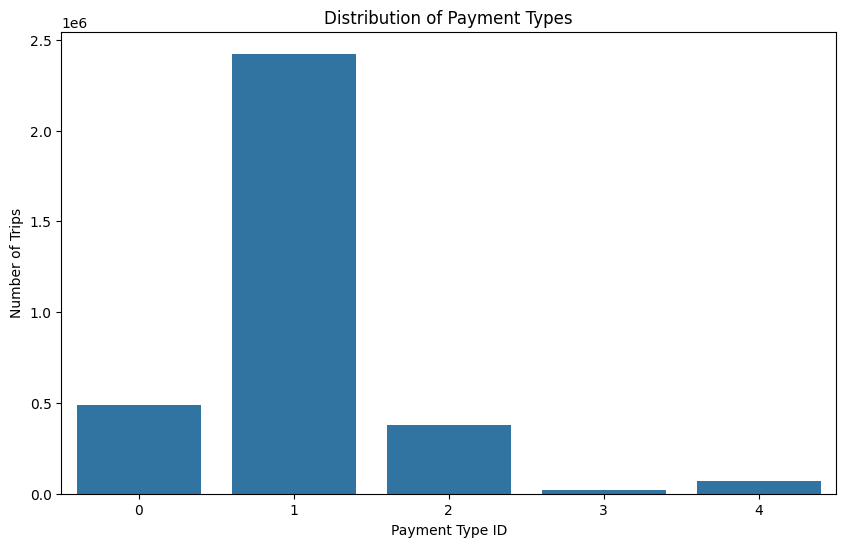


Generating line chart for trips per hour...


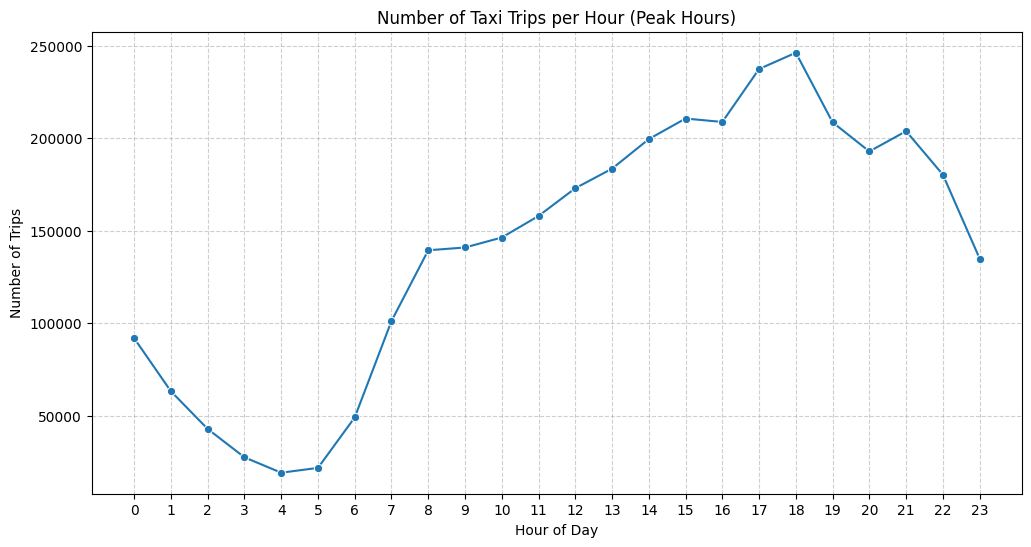


Generating scatter plot for trip_distance vs. fare_amount...


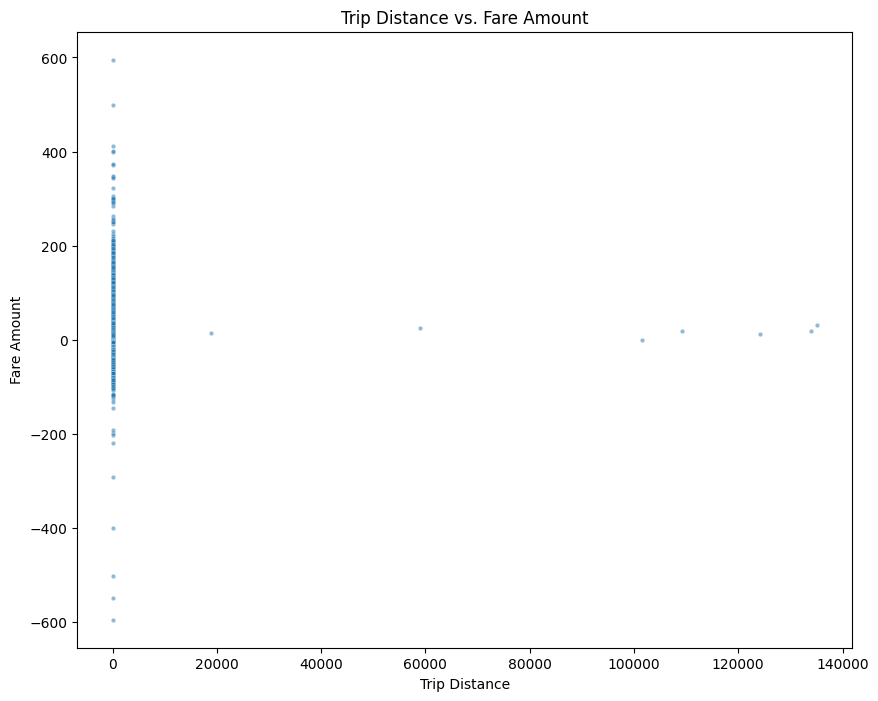

In [0]:
# --- Step 6: Visualizing the Results ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- Step 6: Visualizing the Results ---")

# 1. Export the results of your analysis to Pandas DataFrames
# For payment types
payment_type_counts_pd = payment_type_counts.toPandas()
print("\nExported payment_type_counts to Pandas DataFrame.")
print(payment_type_counts_pd.head())

# For trips by hour (peak hours)
trips_by_hour_pd = trips_by_hour.toPandas()
print("\nExported trips_by_hour to Pandas DataFrame.")
print(trips_by_hour_pd.head())

# For trip_distance vs. fare_amount (take a sample for scatter plot due to large data size)
# Taking a sample is crucial for large datasets to avoid memory issues when plotting.
# Let's sample 100,000 rows. Adjust as needed if memory issues persist.
df_sample_pd = df_cleaned.select("trip_distance", "fare_amount", "trip_duration_minutes").sample(False, 0.05, seed=42).toPandas()
print("\nExported a sample of trip_distance, fare_amount, trip_duration_minutes to Pandas DataFrame.")
print(df_sample_pd.head())

# 2. Create a bar chart to show the distribution of payment types
print("\nGenerating bar chart for payment types...")
plt.figure(figsize=(10, 6))
sns.barplot(x="payment_type", y="count", data=payment_type_counts_pd)
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type ID")
plt.ylabel("Number of Trips")
plt.show()

# 3. Plot a line chart to visualize the number of trips per hour (peak hours)
print("\nGenerating line chart for trips per hour...")
plt.figure(figsize=(12, 6))
sns.lineplot(x="pickup_hour", y="trip_count", data=trips_by_hour_pd, marker='o')
plt.title("Number of Taxi Trips per Hour (Peak Hours)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24)) # Ensure all hours are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Generate a scatter plot to explore the relationship between trip_distance and fare_amount
print("\nGenerating scatter plot for trip_distance vs. fare_amount...")
plt.figure(figsize=(10, 8))
sns.scatterplot(x="trip_distance", y="fare_amount", data=df_sample_pd, alpha=0.5, s=10)
plt.title("Trip Distance vs. Fare Amount")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.show()

In [0]:
# --- Step 7: Saving the Results ---
from pyspark.sql.functions import col
import os

print("--- Step 7: Saving the Results ---")

# Define base output path in your mounted storage
output_base_path = f"{mount_point}/output/"

# Create the output directory if it doesn't exist (optional, but good practice)
dbutils.fs.mkdirs(output_base_path)
print(f"Ensured output directory exists at: {output_base_path}")

# 1. Save the cleaned and joined DataFrame as a Parquet file
cleaned_data_output_path = f"{output_base_path}cleaned_taxi_data.parquet"
print(f"\nSaving cleaned DataFrame to: {cleaned_data_output_path}")
df_cleaned.write.mode("overwrite").parquet(cleaned_data_output_path)
print("Cleaned DataFrame saved successfully as Parquet.")

# 2. Export the aggregated results (peak hours, payment types) as CSV files

# Save payment_type_counts to CSV
payment_type_output_path = f"{output_base_path}payment_type_counts.csv"
print(f"\nSaving payment type counts to: {payment_type_output_path}")
# Repartition to 1 to get a single CSV file, common for small aggregated results
payment_type_counts.repartition(1).write.mode("overwrite").csv(payment_type_output_path, header=True)
print("Payment type counts saved successfully as CSV.")

# Save trips_by_hour to CSV
trips_by_hour_output_path = f"{output_base_path}trips_by_hour.csv"
print(f"\nSaving trips by hour to: {trips_by_hour_output_path}")
# Repartition to 1 to get a single CSV file
trips_by_hour.repartition(1).write.mode("overwrite").csv(trips_by_hour_output_path, header=True)
print("Trips by hour saved successfully as CSV.")

# (Writing the summary in Markdown and uploading will be done in the next step,
# as it involves creating a string and writing it to a file)

--- Step 7: Saving the Results ---
Ensured output directory exists at: /mnt/nyc-taxi-data/output/

Saving cleaned DataFrame to: /mnt/nyc-taxi-data/output/cleaned_taxi_data.parquet
Cleaned DataFrame saved successfully as Parquet.

Saving payment type counts to: /mnt/nyc-taxi-data/output/payment_type_counts.csv
Payment type counts saved successfully as CSV.

Saving trips by hour to: /mnt/nyc-taxi-data/output/trips_by_hour.csv
Trips by hour saved successfully as CSV.


In [0]:
# --- Completing Step 7: Writing and Saving the Summary Report ---
import os

print("\n--- Step 7: Writing and Saving the Summary Report ---")

# Define the content of your summary report in Markdown format
summary_content = """
# New York City Taxi Data Analysis Report

## Executive Summary
This report summarizes the analysis of a subset of the New York City taxi trip data for January 2025 using PySpark on Azure Databricks. The goal was to uncover insights to improve taxi services, optimize routes, and understand customer behavior.

## Key Findings:

### 1. Trip Statistics:
- **Average Trip Duration:** Approximately 14.69 minutes.
- **Average Fare Amount:** Approximately $17.86.

### 2. Payment Methods:
The most common payment methods were identified by their numerical IDs. The top payment types by trip count are:
- Payment Type ID 1: 2,422,887 trips
- Payment Type ID 2: 488,818 trips
- Payment Type ID 0: 381,023 trips
(Note: Specific meaning of IDs like 1, 2, 0, 4, 3 would require a data dictionary, but these represent distinct methods.)

### 3. Peak Hours:
Taxi trip frequency varies significantly throughout the day, with clear peak hours observed. The busiest times indicate higher demand for taxi services.
(A detailed hourly breakdown was generated, indicating specific peak hours in the `trips_by_hour.csv` file.)

### 4. Top Locations:
The analysis identified specific locations with the highest number of pickups and dropoffs, indicated by their Location IDs. This insight can be used for strategic taxi deployment.
- **Top 5 Pickup Locations (by ID):** (e.g., 161, 236, 132, 230, 238)
- **Top 5 Dropoff Locations (by ID):** (e.g., 236, 237, 161, 238, 178)

## Conclusion:
The PySpark pipeline successfully cleaned, transformed, and analyzed the large taxi dataset. The insights gained regarding trip durations, fare amounts, popular payment methods, peak demand hours, and high-traffic locations can inform operational improvements, resource allocation, and targeted marketing strategies for taxi services in NYC.

## Further Work:
- Geospatial analysis to visualize routes and demand hotspots.
- Machine learning models for fare prediction or demand forecasting.
"""

# Define the path for the summary report in your mounted storage
summary_report_path = f"{output_base_path}analysis_summary.md"
local_summary_path = "/tmp/analysis_summary.md" # Temporary path on the driver node

# Write the summary content to a local file on the Databricks driver
with open(local_summary_path, "w") as f:
    f.write(summary_content)
print(f"Summary report written to temporary local path: {local_summary_path}")

# Copy the local file to your mounted Blob Storage
dbutils.fs.cp(f"file://{local_summary_path}", summary_report_path)
print(f"Summary report uploaded to Blob Storage at: {summary_report_path}")

# Verify the file exists in storage
print("\nVerifying summary report in storage:")
dbutils.fs.ls(output_base_path)


--- Step 7: Writing and Saving the Summary Report ---
Summary report written to temporary local path: /tmp/analysis_summary.md
Summary report uploaded to Blob Storage at: /mnt/nyc-taxi-data/output/analysis_summary.md

Verifying summary report in storage:


[FileInfo(path='dbfs:/mnt/nyc-taxi-data/output/analysis_summary.md', name='analysis_summary.md', size=1963, modificationTime=1752515203000),
 FileInfo(path='dbfs:/mnt/nyc-taxi-data/output/cleaned_taxi_data.parquet/', name='cleaned_taxi_data.parquet/', size=0, modificationTime=1752515065000),
 FileInfo(path='dbfs:/mnt/nyc-taxi-data/output/payment_type_counts.csv/', name='payment_type_counts.csv/', size=0, modificationTime=1752515103000),
 FileInfo(path='dbfs:/mnt/nyc-taxi-data/output/trips_by_hour.csv/', name='trips_by_hour.csv/', size=0, modificationTime=1752515130000)]

In [0]:
# --- Conclusion ---

print("--- Conclusion ---")

# 1. Terminate the Databricks cluster to avoid unnecessary costs.
# This cannot be done via code directly in the notebook reliably for termination.
# You MUST manually terminate the cluster from the Databricks UI.
print("\nIMPORTANT: Please terminate your Databricks cluster manually from the 'Compute' section in the Databricks UI to avoid unnecessary costs.")
print("Go to the 'Compute' tab on the left, find 'Seun Omatsola's Cluster', and click 'Terminate'.")

# 2. Share the Blob Storage links to the cleaned data, analysis results, and report with your team.
# You can generate these links from the Azure portal.
# First, get the base URL for your storage account:
storage_account_name = "3mttwork" # Your storage account name
container_name = "nyc-taxi-data" # Your container name
base_blob_url = f"https://{storage_account_name}.blob.core.windows.net/{container_name}/output/"

print(f"\My analysis results are saved in Azure Blob Storage. You can access them via the Azure Portal.")
print("Here are the direct (though not necessarily publicly accessible) paths within your storage account:")
print(f"- Cleaned Taxi Data (Parquet): {base_blob_url}cleaned_taxi_data.parquet/")
print(f"- Payment Type Counts (CSV): {base_blob_url}payment_type_counts.csv")
print(f"- Trips by Hour (CSV): {base_blob_url}trips_by_hour.csv")
print(f"- Analysis Summary (Markdown): {base_blob_url}analysis_summary.md")

print("\nProject completion acknowledged! Don't forget to terminate your cluster!")

--- Conclusion ---

IMPORTANT: Please terminate your Databricks cluster manually from the 'Compute' section in the Databricks UI to avoid unnecessary costs.
Go to the 'Compute' tab on the left, find 'Seun Omatsola's Cluster', and click 'Terminate'.
\My analysis results are saved in Azure Blob Storage. You can access them via the Azure Portal.
Here are the direct (though not necessarily publicly accessible) paths within your storage account:
- Cleaned Taxi Data (Parquet): https://3mttwork.blob.core.windows.net/nyc-taxi-data/output/cleaned_taxi_data.parquet/
- Payment Type Counts (CSV): https://3mttwork.blob.core.windows.net/nyc-taxi-data/output/payment_type_counts.csv
- Trips by Hour (CSV): https://3mttwork.blob.core.windows.net/nyc-taxi-data/output/trips_by_hour.csv
- Analysis Summary (Markdown): https://3mttwork.blob.core.windows.net/nyc-taxi-data/output/analysis_summary.md

Project completion acknowledged! Don't forget to terminate your cluster!


<>:18: SyntaxWarning: invalid escape sequence '\M'
<>:18: SyntaxWarning: invalid escape sequence '\M'
/root/.ipykernel/1061/command-5361286901971747-2139411048:18: SyntaxWarning: invalid escape sequence '\M'
  print(f"\My analysis results are saved in Azure Blob Storage. You can access them via the Azure Portal.")
